In [65]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
stemmer = nltk.SnowballStemmer('english')
stopword  = set(stopwords.words('english'))

In [128]:
data = pd.read_csv('hate_data.csv')

In [129]:
data.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [130]:
data.shape

(24783, 6)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [132]:
data.isna().sum()

count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [133]:
data['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

<AxesSubplot:xlabel='hate_speech', ylabel='count'>

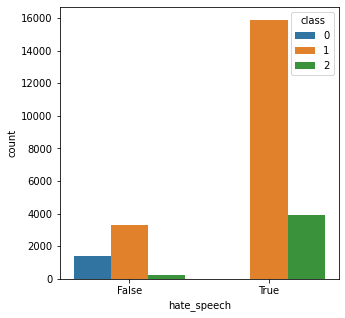

In [134]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['hate_speech']==0,hue=data['class'])

<AxesSubplot:xlabel='offensive_language', ylabel='count'>

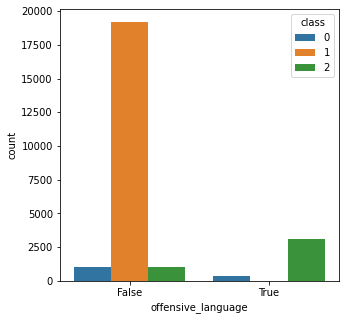

In [135]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['offensive_language']==0,hue=data['class'])

<AxesSubplot:xlabel='neither', ylabel='count'>

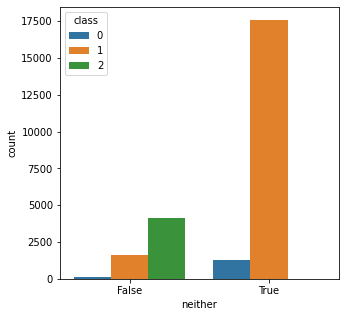

In [136]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['neither']==0,hue=data['class'])

In [137]:
data['labels']=data['class'].map({0:'Hate Speech',1:'Offensive Language',2:'No hate or offensive speech'})

In [138]:
data['labels'].head()

0    No hate or offensive speech
1             Offensive Language
2             Offensive Language
3             Offensive Language
4             Offensive Language
Name: labels, dtype: object

In [139]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub(r"(https?://|www\.)\S+",'',text)
    text = re.sub(r"\d+",'',text)
    text = re.sub(r"[^\w\s]",'',text)
    text = re.sub(r"\s+$",'',text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = ' '.join(text)

    return text

In [140]:
clean_text('Kill i anish will @1.?')

'kill anish'

In [141]:
data['clean_tweet']=data['tweet'].apply(clean_text)
data.head()

,count,hate_speech,offensive_language,neither,class,tweet,labels,clean_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive speech,rt mayasolovely woman shouldnt complain clean...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language,rt mleew boy dats coldtyga dwn bad cuffin dat...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language,rt urkindofbrand dawg rt sbabylife ever fuck ...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language,rt c_g_anderson viva_based look like tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language,rt shenikaroberts shit hear might true might ...


In [142]:
X = np.array(data['clean_tweet'])
y = data['labels']

In [143]:
cv = CountVectorizer()
X_cv = cv.fit_transform(X)

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size=0.2,random_state=42)

In [145]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)

In [168]:
input_text = 'your work is shit'
input_text = clean_text(input_text)
input_df = cv.transform([input_text]).toarray()
model.predict(input_df)

array(['Offensive Language'], dtype=object)